task 1

In [1]:
import numpy as np
import scipy.integrate as integrate

def black_body_integral():
    def integrand(z):
        x = z / (1 - z)
        if x > 100:
            return (x**3 * np.exp(-x)) / ((1 - z)**2)
        return (x**3 / (np.exp(x) - 1)) / ((1 - z)**2)

    result, _ = integrate.quad(integrand, 0, 1)
    return result

integral_value = black_body_integral()
print(f"Integral result: {integral_value}")


Integral result: 6.493939402266829


In [2]:
def compute_stefan_boltzmann():
    k = 1.38064852e-23  # J/K
    h = 6.626e-34  # J*s
    c = 3e8  # m/s
    hbar = h / (2 * np.pi)
    
    prefactor = k**4 / (c**2 * hbar**3 * 4 * np.pi**2)
    sigma = integral_value * prefactor
    return sigma

sigma_value = compute_stefan_boltzmann()
print(f"Stefan-Boltzmann constant: {sigma_value} W/(m^2 K^4)")


Stefan-Boltzmann constant: 5.6627035034540445e-08 W/(m^2 K^4)


In [3]:
def black_body_direct_integral():
    def integrand(x):
        return x**3 / (np.exp(x) - 1)
    
    result, _ = integrate.quad(integrand, 0, np.inf)
    return result

direct_integral_value = black_body_direct_integral()
sigma_direct = direct_integral_value * compute_stefan_boltzmann()
print(f"Stefan-Boltzmann constant (quad): {sigma_direct} W/(m^2 K^4)")


Stefan-Boltzmann constant (quad): 3.677325340443464e-07 W/(m^2 K^4)


/tmp/ipykernel_31293/3670149003.py:3: RuntimeWarning: overflow encountered in exp
  return x**3 / (np.exp(x) - 1)


task 2

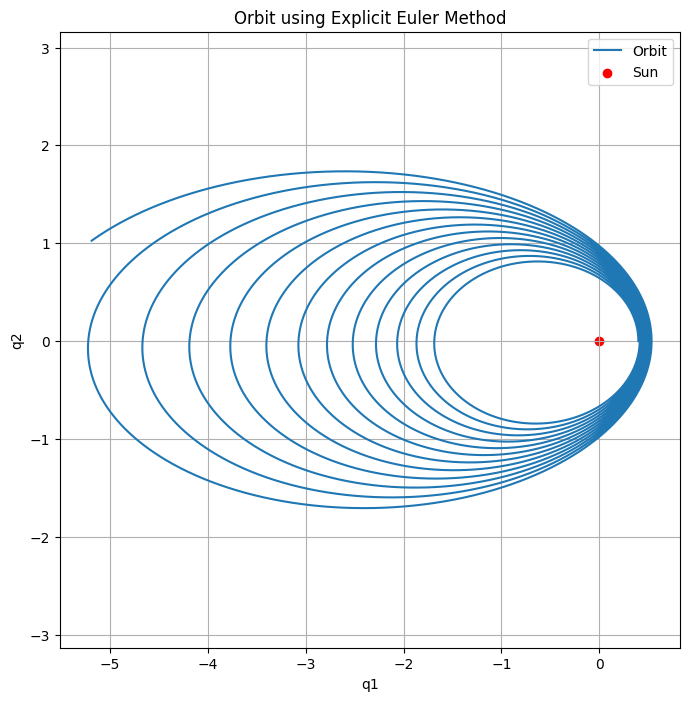

In [4]:
import matplotlib.pyplot as plt

def simulate_orbit_euler(e=0.6, Tf=200, N=100000):
    dt = Tf / N
    q = np.zeros((N, 2))
    p = np.zeros((N, 2))

    q[0, 0] = 1 - e  
    p[0, 1] = np.sqrt((1 + e) / (1 - e))

    for n in range(N - 1):
        r = np.sqrt(q[n, 0]**2 + q[n, 1]**2)
        acc = -q[n] / r**3
        p[n + 1] = p[n] + dt * acc
        q[n + 1] = q[n] + dt * p[n]

    plt.figure(figsize=(8, 8))
    plt.plot(q[:, 0], q[:, 1], label="Orbit")
    plt.scatter([0], [0], color='red', marker='o', label="Sun")
    plt.xlabel("q1")
    plt.ylabel("q2")
    plt.legend()
    plt.title("Orbit using Explicit Euler Method")
    plt.axis('equal')
    plt.grid()
    plt.show()

simulate_orbit_euler()


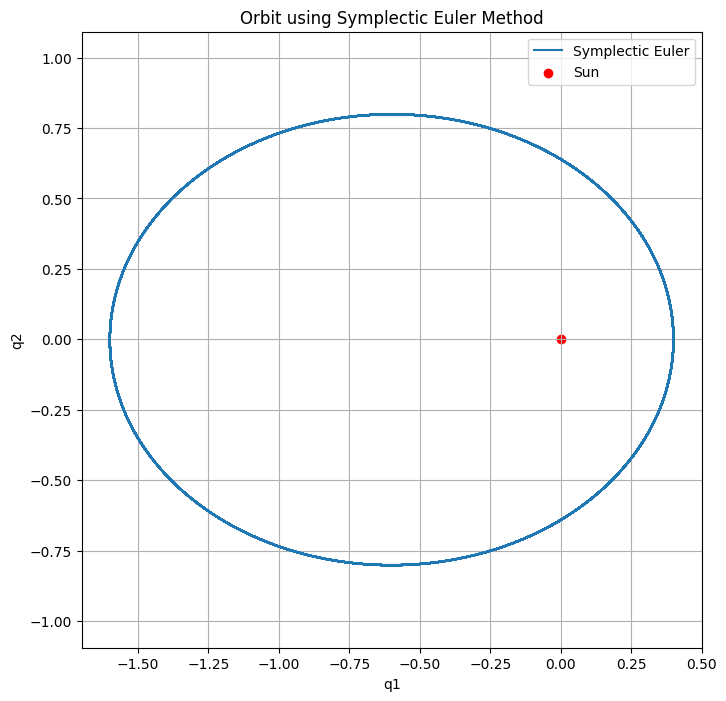

In [5]:
def simulate_orbit_symplectic(e=0.6, Tf=200, N=400000):
    dt = Tf / N
    q = np.zeros((N, 2))
    p = np.zeros((N, 2))

    q[0, 0] = 1 - e  
    p[0, 1] = np.sqrt((1 + e) / (1 - e))

    for n in range(N - 1):
        r = np.sqrt(q[n, 0]**2 + q[n, 1]**2)
        acc = -q[n] / r**3
        p[n + 1] = p[n] + dt * acc
        q[n + 1] = q[n] + dt * p[n + 1]

    plt.figure(figsize=(8, 8))
    plt.plot(q[:, 0], q[:, 1], label="Symplectic Euler")
    plt.scatter([0], [0], color='red', marker='o', label="Sun")
    plt.xlabel("q1")
    plt.ylabel("q2")
    plt.legend()
    plt.title("Orbit using Symplectic Euler Method")
    plt.axis('equal')
    plt.grid()
    plt.show()

simulate_orbit_symplectic()


task 3

/tmp/ipykernel_31293/3538438143.py:13: RuntimeWarning: overflow encountered in scalar power
  H_prime = lambda theta: 4 * theta**3 - 16 * theta + 8 * np.pi * np.sin(4 * np.pi * theta)
/tmp/ipykernel_31293/3538438143.py:13: RuntimeWarning: invalid value encountered in scalar subtract
  H_prime = lambda theta: 4 * theta**3 - 16 * theta + 8 * np.pi * np.sin(4 * np.pi * theta)
/tmp/ipykernel_31293/3538438143.py:13: RuntimeWarning: invalid value encountered in sin
  H_prime = lambda theta: 4 * theta**3 - 16 * theta + 8 * np.pi * np.sin(4 * np.pi * theta)


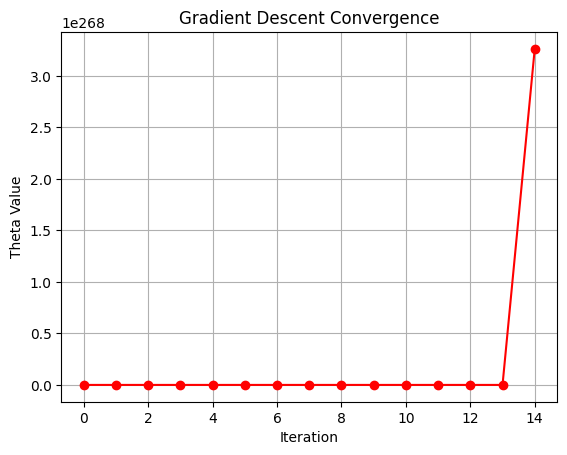

In [6]:
def gradient_descent(H_derivative, theta0, alpha=0.1, max_steps=100):
    theta = theta0
    history = [theta]

    for _ in range(max_steps):
        theta -= alpha * H_derivative(theta)
        history.append(theta)
        if np.abs(H_derivative(theta)) < 1e-6:
            break

    return np.array(history)

H_prime = lambda theta: 4 * theta**3 - 16 * theta + 8 * np.pi * np.sin(4 * np.pi * theta)
theta_vals = gradient_descent(H_prime, -1)

plt.plot(theta_vals, 'ro-')
plt.xlabel("Iteration")
plt.ylabel("Theta Value")
plt.title("Gradient Descent Convergence")
plt.grid()
plt.show()



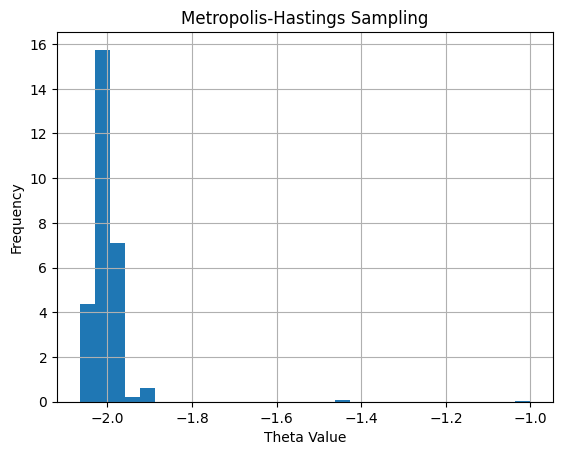

In [7]:
def metropolis_hastings(H, theta0, beta=1.0, steps=1000):
    theta = theta0
    samples = [theta]

    for _ in range(steps):
        theta_new = theta + np.random.normal(0, 0.5)
        delta_H = H(theta_new) - H(theta)

        if np.exp(-beta * delta_H) > np.random.rand():
            theta = theta_new

        samples.append(theta)

    return np.array(samples)

H_func = lambda theta: theta**4 - 8 * theta**2 - 2 * np.cos(4 * np.pi * theta)
samples = metropolis_hastings(H_func, -1, beta=5.0)

plt.hist(samples, bins=30, density=True)
plt.xlabel("Theta Value")
plt.ylabel("Frequency")
plt.title("Metropolis-Hastings Sampling")
plt.grid()
plt.show()


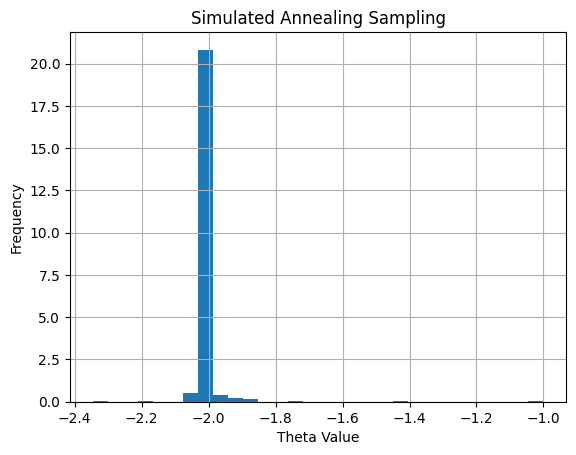

In [8]:
def simulated_annealing(H, theta0, beta_start=1.0, beta_end=10.0, steps=1000, delta_beta=0.05):
    theta = theta0
    beta = beta_start
    samples = [theta]

    for _ in range(steps):
        theta_new = theta + np.random.normal(0, 0.5)
        delta_H = H(theta_new) - H(theta)

        if np.exp(-beta * delta_H) > np.random.rand():
            theta = theta_new

        samples.append(theta)
        beta += delta_beta  

    return np.array(samples)

sa_samples = simulated_annealing(H_func, -1, beta_start=1.0, beta_end=10.0)

plt.hist(sa_samples, bins=30, density=True)
plt.xlabel("Theta Value")
plt.ylabel("Frequency")
plt.title("Simulated Annealing Sampling")
plt.grid()
plt.show()
